In [95]:
import csv

# with open('../data/text_classification/test.tsv') as f:
with open('../data/fspc_poem/test.tsv') as f:
    reader = csv.reader(f, delimiter='\t')
    next(reader)
    labels = list(l for _, l in reader)

In [96]:
from collections import Counter
Counter(labels)

Counter({'2': 154, '4': 147, '3': 147, '1': 27, '5': 25})

In [101]:
# with open('../output/guwenbert/text_classification/predict_results.txt') as f:
with open('../output/guwenbert/fspc_poem/predict_results.txt') as f:
    reader = csv.reader(f, delimiter='\t')
    next(reader)
    preds = list(l for i, l in reader)


In [102]:
len(preds), sum([l == p for l, p in zip(labels, preds)]), sum([l == p for l, p in zip(labels, preds)]) / len(preds)

(500, 298, 0.596)

In [103]:
from sklearn.metrics import confusion_matrix

/home/yantan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/yantan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator


<Figure size 432x288 with 0 Axes>

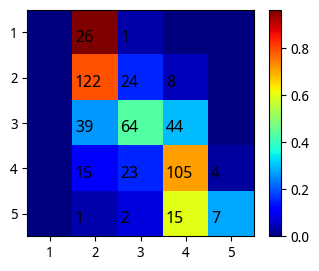

In [104]:
from numpy import *
import matplotlib.pyplot as plt
from pylab import *

font_name = 'WenQuanYi Micro Hei' 
plt.rcParams['font.family'] = font_name #用来正常显示中文标签 
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号


# classes = ['易藏', '医藏', '艺藏', '史藏', '佛藏', '集藏', '诗藏', '子藏', '儒藏', '道藏']
classes = ['1', '2', '3', '4', '5']
conf_arr = confusion_matrix(labels, preds, labels=classes)
norm_conf = []
for i in conf_arr:
    a = 0
    tmp_arr = []
    a = sum(i,0)
    for j in i:
        tmp_arr.append(float(j)/float(a))
    norm_conf.append(tmp_arr)

plt.clf()
fig=plt.figure(figsize=(4,3), dpi= 100, facecolor='w', edgecolor='k')

ax = fig.add_subplot(111)
res = ax.imshow(array(norm_conf), cmap=cm.jet, interpolation='nearest')
ax.set_xticklabels(classes)
ax.set_xticks(range(len(classes)))
ax.set_yticklabels(classes)
ax.set_yticks(range(len(classes)))

for i, cas in enumerate(conf_arr):
    for j, c in enumerate(cas):
        if c>0:
            plt.text(j-.45, i+.2, c, fontsize=12)
cb = fig.colorbar(res)